# Phase2Pro - Iteration 2

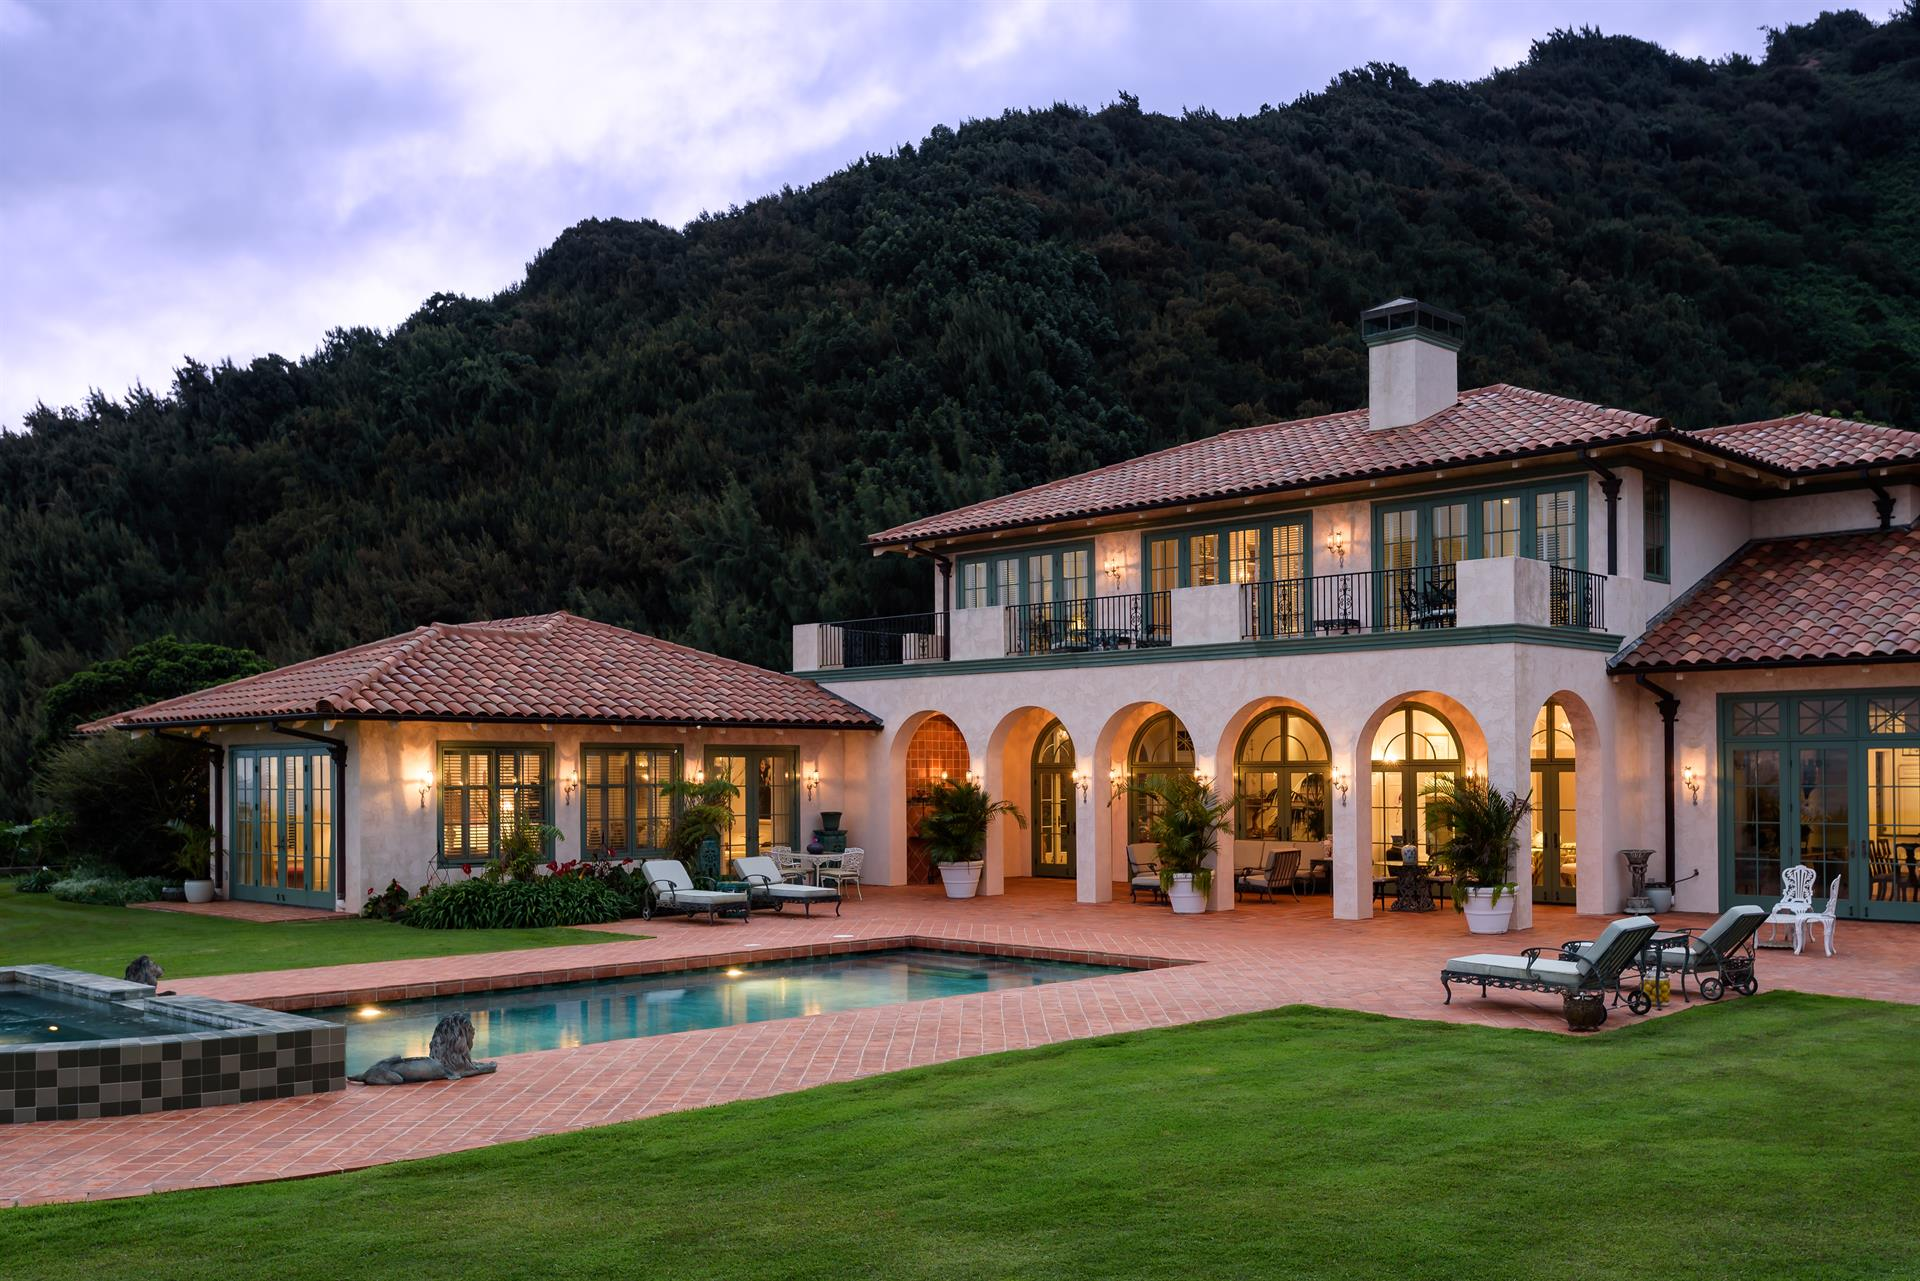

In [1]:
#x = "sqft_lot"  - "size"
#y = "price'"    - "value"
#z =  "zip_code" - "location"

In [2]:
# Import standard packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.linear_model import LinearRegression
%matplotlib inline

In [3]:
#Read - kc_house_data.csv
#data for Seattle WA and surrounding vicinity
df = pd.read_csv('data\\kc_house_data.csv') 

In [4]:
#reviewing data values 
df.nunique()

id               21420
date               372
price             3622
bedrooms            12
bathrooms           29
sqft_living       1034
sqft_lot          9776
floors               6
waterfront           2
view                 5
condition            5
grade               11
sqft_above         942
sqft_basement      304
yr_built           116
yr_renovated        70
zipcode             70
lat               5033
long               751
sqft_living15      777
sqft_lot15        8682
dtype: int64

In [5]:
#Itemising columns 
df.columns

Index(['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode',
       'lat', 'long', 'sqft_living15', 'sqft_lot15'],
      dtype='object')

In [6]:
#Reviewing clean table
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,NaN,0.0,...,7,1180,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,0.0,0.0,...,7,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,0.0,0.0,...,6,770,0.0,1933,NaN,98028,47.7379,-122.233,2720,8062
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,0.0,0.0,...,7,1050,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,0.0,0.0,...,8,1680,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503


In [7]:
#Removing unnecessary columns
df.drop(['id', 'date', 'waterfront', 'sqft_above', 'sqft_basement', 'lat', 'long', 'view', 'sqft_living15', 'sqft_lot15', 'waterfront', 'yr_renovated'], axis=1, inplace=True)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   price        21597 non-null  float64
 1   bedrooms     21597 non-null  int64  
 2   bathrooms    21597 non-null  float64
 3   sqft_living  21597 non-null  int64  
 4   sqft_lot     21597 non-null  int64  
 5   floors       21597 non-null  float64
 6   condition    21597 non-null  int64  
 7   grade        21597 non-null  int64  
 8   yr_built     21597 non-null  int64  
 9   zipcode      21597 non-null  int64  
dtypes: float64(3), int64(7)
memory usage: 1.6 MB


In [9]:
#Reviewing data
df.mean().astype(int)

price          540296
bedrooms            3
bathrooms           2
sqft_living      2080
sqft_lot        15099
floors              1
condition           3
grade               7
yr_built         1970
zipcode         98077
dtype: int32

In [10]:
#Checking if null values exist and dtype 
df.isnull().sum()

price          0
bedrooms       0
bathrooms      0
sqft_living    0
sqft_lot       0
floors         0
condition      0
grade          0
yr_built       0
zipcode        0
dtype: int64

In [11]:
df.drop_duplicates(inplace=True)

In [12]:
df['bathrooms'] = df['bathrooms'].astype('int64')
df['floors'] = df['floors'].astype('int64')
df['price'] = df['price'].astype('int')

In [13]:
df.dtypes

price          int32
bedrooms       int64
bathrooms      int64
sqft_living    int64
sqft_lot       int64
floors         int64
condition      int64
grade          int64
yr_built       int64
zipcode        int64
dtype: object

In [14]:
df.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,condition,grade,yr_built,zipcode
0,221900,3,1,1180,5650,1,3,7,1955,98178
1,538000,3,2,2570,7242,2,3,7,1951,98125
2,180000,2,1,770,10000,1,3,6,1933,98028
3,604000,4,3,1960,5000,1,5,7,1965,98136
4,510000,3,2,1680,8080,1,3,8,1987,98074


In [15]:
#Using a format to suppress scientific notation rounded 
pd.options.display.float_format = lambda x : '{:.0f}'.format(x) if int(x) == x else '{:,.2f}'.format(x)
#pd.options.display.float_format = '{:.5f}'.format - alternate for actual 

In [16]:
# What makes a house more attractive to purchase? Is it value, is it the location? Does it depend on the number of levels it has? 
##Lets take a deeper dive into the data to discover further insights of interest. 

In [17]:
#Looking at all the data that we need to understand the dataset 
df.describe()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,condition,grade,yr_built,zipcode
count,21589,21589,21589,21589,21589,21589,21589,21589,21589,21589
mean,"540,308.35",3.37,1.75,"2,080.42","15,103.90",1.45,3.41,7.66,"1,970.99","98,077.95"
std,"367,428.32",0.93,0.73,918.23,"41,419.63",0.55,0.65,1.17,29.37,53.52
min,78000,1,0,370,520,1,1,3,1900,98001
25%,322000,3,1,1430,5042,1,3,7,1951,98033
50%,450000,3,2,1910,7620,1,3,7,1975,98065
75%,645000,4,2,2550,10688,2,4,8,1997,98118
max,7700000,33,8,13540,1651359,3,5,13,2015,98199


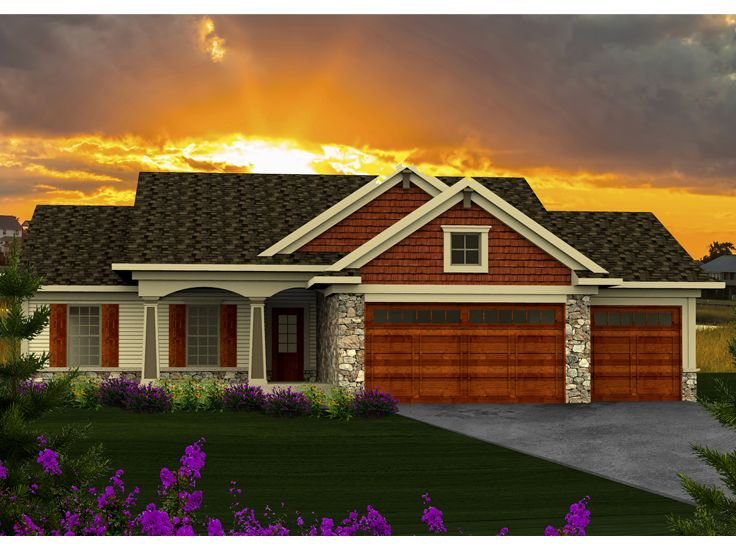

In [18]:
#find the mean of the proces of houses in Seattle 
df['price'].mean()

540308.3467506601

In [19]:
val = math.ceil(12.99)
print (val)
val = df['price'].mean()
print (val)

13
540308.3467506601


In [20]:
# State your hypotheses 
# Ha : there is an increase in grades after program
# Ho : there is no increase in grade 

## Objectives

You will be able to:
* Perform a linear regression using statsmodels
* Evaluate a linear regression model by using statistical performance metrics pertaining to overall model and specific parameters
* Determine if a particular set of data exhibits the assumptions of linear regression

## Let's get started

#In this lab, you'll work with the "Advertising Dataset", which is a very popular dataset for studying simple regression. [The dataset is available on Kaggle](https://www.kaggle.com/purbar/advertising-data), but we have downloaded it for you. It is available in this repository as `advertising.csv`. You'll use this dataset to answer this question:

#> Which advertising channel has the strongest relationship with sales volume, and can be used to model and predict the sales?

## Step 1: Read the dataset and inspect its columns and 5-point statistics


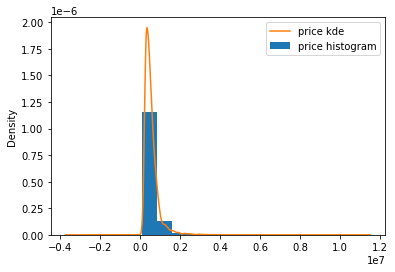

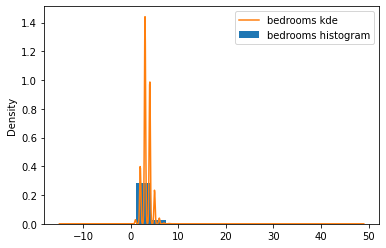

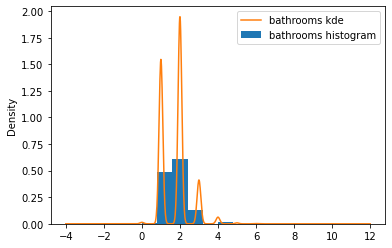

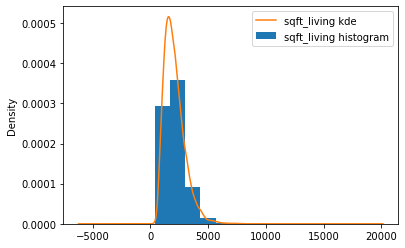

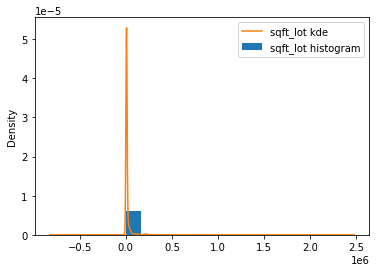

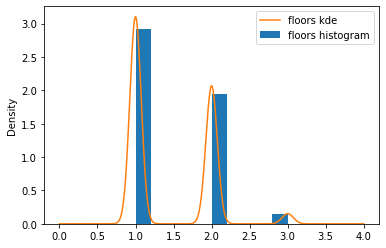

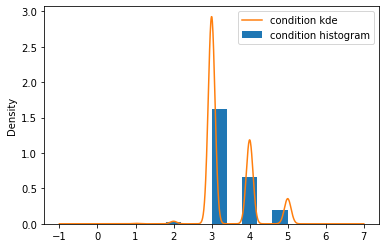

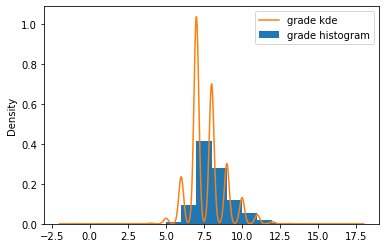

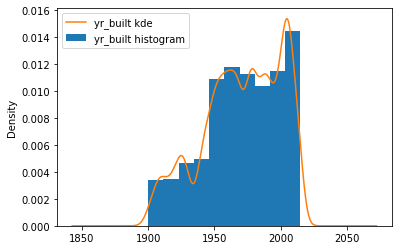

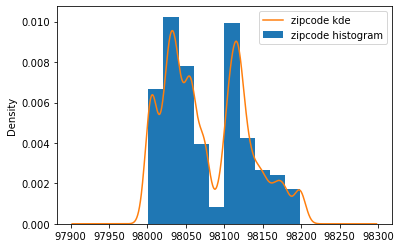

In [21]:
# For all the variables, check distribution by creating a histogram with kde
for column in df:
    df[column].plot.hist(density=True, label = column+' histogram')
    df[column].plot.kde(label =column+' kde')
    plt.legend()
    plt.show()

In [22]:
# Record your observations here 
# Record your observations here 

# No variable is "perfectly" normal, but these do tend to follow an overall normal pattern. 
# We see major skew in the newspaper predictor which could be problematic towards analysis. 
# TV and radio are still pretty symmetrical distributions and can be used as predictors
# The target variable "sales" is normally distributed with just a gentle skew

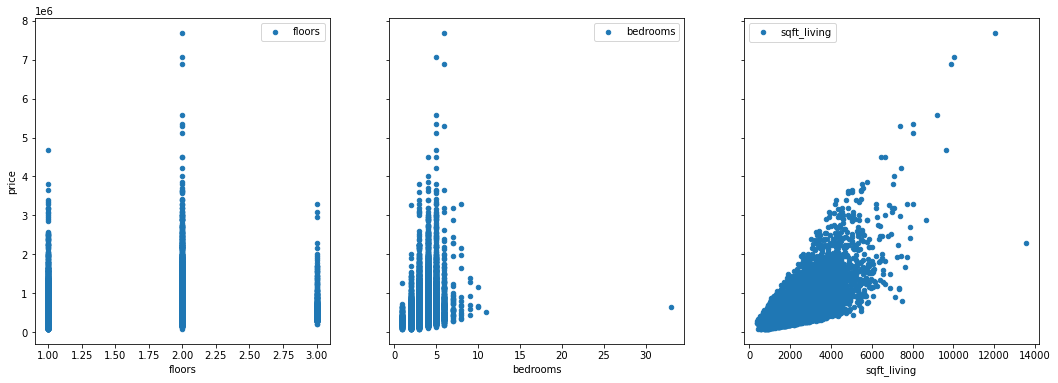

In [23]:
# visualize the relationship between the predictors and the target using scatterplots

fig, axs = plt.subplots(1, 3, sharey=True, figsize=(18, 6))
for idx, housedata in enumerate(['floors', 'bedrooms', 'sqft_living']):
    df.plot(kind='scatter', x=housedata, y='price', ax=axs[idx], label=housedata)
plt.legend()
plt.show()

In [24]:
# Record yor observations on linearity here 
# TV seems to be a good feature due to highly linear relationship with sales
# radio shows a linear pattern as well but there a higher level of variance in there than TV
# newspaper is worse, there is too much variance along the y-axis and there's no clear linear relationship 
# between newspaper and sales.

In [25]:
# import libraries
import statsmodels.api as sm
import statsmodels.formula.api as smf

# build the formula 
f = 'price~sqft_living'
# create a fitted model in one line
model = smf.ols(formula=f, data=df).fit()

In [26]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.493
Model:                            OLS   Adj. R-squared:                  0.493
Method:                 Least Squares   F-statistic:                 2.097e+04
Date:                Fri, 13 May 2022   Prob (F-statistic):               0.00
Time:                        20:41:51   Log-Likelihood:            -2.9995e+05
No. Observations:               21589   AIC:                         5.999e+05
Df Residuals:                   21587   BIC:                         5.999e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept   -4.404e+04   4411.108     -9.984      0.000   -5.27e+04   -3.54e+04
sqft_living   280.8815      1.940    144.801      0.000     277.079     284.684
==============================================================================
Omnibus:                    14794.997   Durbin-Watson:                   1.982
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           542159.026
Skew:                           2.819   Prob(JB):                         0.00
Kurtosis:                      26.894   Cond. No.                     5.63e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.63e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [27]:
#X_new = pd.DataFrame({'HouseData': [df.sqft_living.min(), df.sqft_living.max()]})
#print(X_new.head())

# make predictions for those x values and store them
#preds = model.predict(X_new)
#print (preds)

# first, plot the observed data and the least squares line
#df.plot(kind='scatter', x='sqft_living', y='prices')
#plt.plot(X_new, preds, c='red', linewidth=2)
#plt.show()

In [28]:
#fig = plt.figure(figsize=(15,8))
#fig = sm.graphics.plot_regress_exog(model, "TV", fig=fig)
#plt.show()